In [1]:
from sklearn import datasets

mnist = datasets.load_digits()
X = mnist.data
Y = mnist.target

In [2]:
print(X.shape, Y.shape)
print(X[0])
print(Y[0])

(1797, 64) (1797,)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
0


In [3]:
import numpy as np

# set seed
np.random.seed(1234)

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.7, random_state=0)

In [5]:
from keras.utils import np_utils

def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

# One hot encode labels for training and test sets.
train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(64,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y_ohe, epochs=200, batch_size=100)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 2.4229 - acc: 0.0804     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 2.2777 - acc: 0.0963     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 2.1632 - acc: 0.1440     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 2.0630 - acc: 0.2037     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 1.9678 - acc: 0.3055     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 1.8800 - acc: 0.3699     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 1.7899 - acc: 0.4368     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 1.7187 - acc: 0.5195     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 1.6492 - acc: 0.6046     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 1.5818 - acc: 0.6547     
Epoch 11/200
1257/1257 [==============================] - 0

1257/1257 [==============================] - 0s - loss: 0.1982 - acc: 0.9849     
Epoch 88/200
1257/1257 [==============================] - 0s - loss: 0.1952 - acc: 0.9849     
Epoch 89/200
1257/1257 [==============================] - 0s - loss: 0.1911 - acc: 0.9873     
Epoch 90/200
1257/1257 [==============================] - 0s - loss: 0.1879 - acc: 0.9873     
Epoch 91/200
1257/1257 [==============================] - 0s - loss: 0.1847 - acc: 0.9873     
Epoch 92/200
1257/1257 [==============================] - 0s - loss: 0.1817 - acc: 0.9889     
Epoch 93/200
1257/1257 [==============================] - 0s - loss: 0.1785 - acc: 0.9889     
Epoch 94/200
1257/1257 [==============================] - 0s - loss: 0.1752 - acc: 0.9881     
Epoch 95/200
1257/1257 [==============================] - 0s - loss: 0.1725 - acc: 0.9889     
Epoch 96/200
1257/1257 [==============================] - 0s - loss: 0.1699 - acc: 0.9897     
Epoch 97/200
1257/1257 [==============================] - 0s - 

1257/1257 [==============================] - 0s - loss: 0.0662 - acc: 0.9968     
Epoch 173/200
1257/1257 [==============================] - 0s - loss: 0.0655 - acc: 0.9968     
Epoch 174/200
1257/1257 [==============================] - 0s - loss: 0.0649 - acc: 0.9968     
Epoch 175/200
1257/1257 [==============================] - 0s - loss: 0.0641 - acc: 0.9968     
Epoch 176/200
1257/1257 [==============================] - 0s - loss: 0.0635 - acc: 0.9968     
Epoch 177/200
1257/1257 [==============================] - 0s - loss: 0.0628 - acc: 0.9968     
Epoch 178/200
1257/1257 [==============================] - 0s - loss: 0.0620 - acc: 0.9968     
Epoch 179/200
1257/1257 [==============================] - 0s - loss: 0.0617 - acc: 0.9968     
Epoch 180/200
1257/1257 [==============================] - 0s - loss: 0.0610 - acc: 0.9968     
Epoch 181/200
1257/1257 [==============================] - 0s - loss: 0.0606 - acc: 0.9968     
Epoch 182/200
1257/1257 [=============================

In [9]:
loss, accuracy = model.evaluate(test_X, test_y_ohe)
print(accuracy)

 32/540 [>.............................] - ETA: 0s0.959259260142


In [10]:
from sklearn.metrics import confusion_matrix
pred_y = model.predict(test_X)
confmat = confusion_matrix(y_true=test_y, y_pred=np.argmax(pred_y, axis=1))
print(confmat)

[[44  0  0  0  0  0  1  0  0  0]
 [ 0 49  1  0  0  0  0  0  2  0]
 [ 0  0 51  2  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  1  0 53  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  3  0  0 49  0  1]
 [ 0  2  0  0  0  0  0  0 59  0]
 [ 0  0  0  0  0  1  0  1  0 55]]


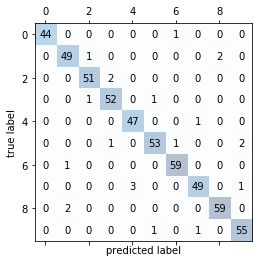

In [11]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i,j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()